<a href="https://colab.research.google.com/github/Tiwari666/Return_Risk_Analysis_Stock/blob/main/Google_Stock_1_Year_Forecast_and_VaR_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime,timedelta
#Using yfinance to access Yahoo Historical Stocks
import yfinance as yf

In [8]:
# List of stock symbols
stock_list = ['META', 'AAPL', 'GOOG', 'MSFT', 'AMZN', 'NFLX']

# End date set to current date
end = datetime.now()

# Start date set to 1 year back from the current date
start = end - timedelta(days=365)

# Download historical data for each stock
stock_data = {}
for stock in stock_list:
    stock_data[stock] = yf.download(stock, start=start, end=end)

# Display the downloaded data (optional)
for stock, data in stock_data.items():
    print(f"Data for {stock}:")
    data.head()  # Display the first few rows of the data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Data for META:
Data for AAPL:
Data for GOOG:
Data for MSFT:
Data for AMZN:
Data for NFLX:


In [9]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-21,432.649994,434.549988,422.540009,424.450012,424.450012,5146400
2023-06-22,422.929993,424.709991,418.679993,422.480011,422.480011,4869500
2023-06-23,418.589996,425.820007,417.730011,424.019989,424.019989,8293900
2023-06-26,422.440002,430.959991,414.899994,415.940002,415.940002,4640000
2023-06-27,417.390015,420.880005,411.500000,417.079987,417.079987,4818100


In [10]:
stock_data['META'].describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,382.811072,387.753055,378.139722,383.196786,382.590801,1.891669e+07
std,84.011637,84.794666,83.064923,84.027951,84.082343,1.028975e+07
min,279.029999,284.000000,274.380005,278.470001,277.898926,4.069986e+06
25%,307.500008,312.254997,301.795006,307.375000,306.744675,1.299420e+07
50%,342.315002,347.755005,339.294998,344.544998,343.838425,1.685470e+07
75%,473.377510,479.007492,468.617508,475.097496,474.249062,2.078458e+07
max,529.280029,531.489990,518.890015,527.340027,526.816956,8.461550e+07


In [11]:
stock_data['GOOG'].describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,143.165607,144.641341,141.922635,143.360238,143.203701,2.163001e+07
std,16.069846,16.121985,15.964723,16.123142,16.118605,8.061672e+06
min,116.760002,118.224998,115.830002,116.870003,116.737160,5.914007e+06
25%,132.136250,133.585003,130.907497,132.334999,132.184578,1.702482e+07
50%,138.907501,140.000000,137.722504,138.950005,138.792068,1.937570e+07
75%,151.350002,152.750000,150.355003,151.812504,151.639942,2.332300e+07
max,179.750000,182.080002,177.779999,179.559998,179.559998,5.879610e+07


In [12]:
stock_data['GOOG'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-06-21 to 2024-06-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


# **Change in Stock Price Over Time**

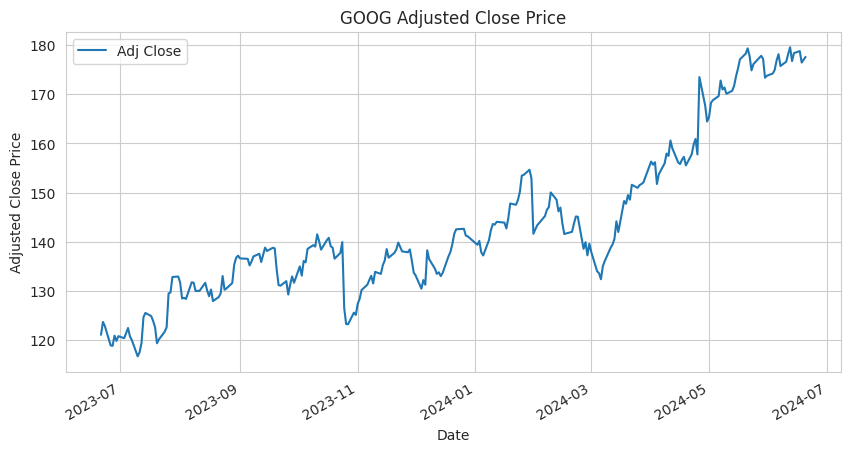

In [13]:
# Resample the 'Adj Close' prices for GOOG to monthly frequency and plot
goog_monthly = stock_data['GOOG']['Adj Close'].resample('M').mean()

#Plot the 'Adj Close' prices for GOOG
plt.figure(figsize=(10, 5))
stock_data['GOOG']['Adj Close'].plot(legend=True)
plt.title('GOOG Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

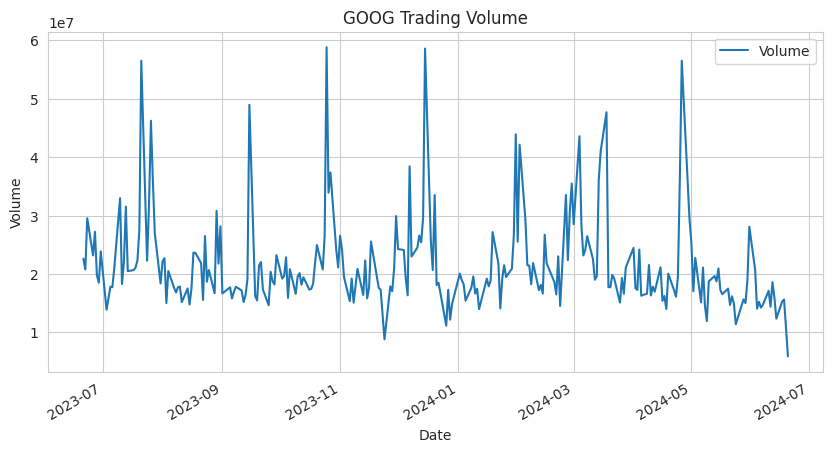

In [14]:
# Plot the 'Volume' for GOOG
plt.figure(figsize=(10, 5))
stock_data['GOOG']['Volume'].plot(legend=True)
plt.title('GOOG Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

# **Intuition from the graph:**

1. GOOG Adjusted Close Price

Description:

The first plot shows the 'Adjusted Close' price of Google (GOOG) stock over the past year.

Key Observations:

Trend: The overall trend of the stock price is upward, indicating a period of growth.

Seasonal Variations: There are fluctuations throughout the year, with some periods of declines followed by recoveries.

Significant Rises: Notable increases can be seen around January and May, suggesting periods of strong performance.

Range: The adjusted close price ranges from about $120 - $180, showing substantial growth over the year.

2. GOOG Trading Volume

Description:

The second plot shows the trading volume of Google (GOOG) stock over the past year.

Key Observations:

Volume Spikes: There are several significant spikes in trading volume, indicating periods of high trading activity. These could be due to earnings reports, major news events, or other market-moving announcements.

Consistency: Outside of the spikes, the trading volume tends to hover around 1 to 2 million shares per day.

Comparison with Price: There isn't a clear direct correlation visible between the volume spikes and the price movement in the adjusted close price plot. However, typically high trading volumes can accompany significant price movements either up or down.

Combined Insights:
Market Activity: The spikes in volume often reflect increased market activity, which can be driven by both positive and negative news.

Growth: The general upward trend in the adjusted close price suggests that the stock has been performing well overall during the past year.

Investor Interest: High volume spikes indicate times when investor interest in GOOG stock was particularly high, possibly due to market events or earnings announcements.

# **Calculating Moving Averages**

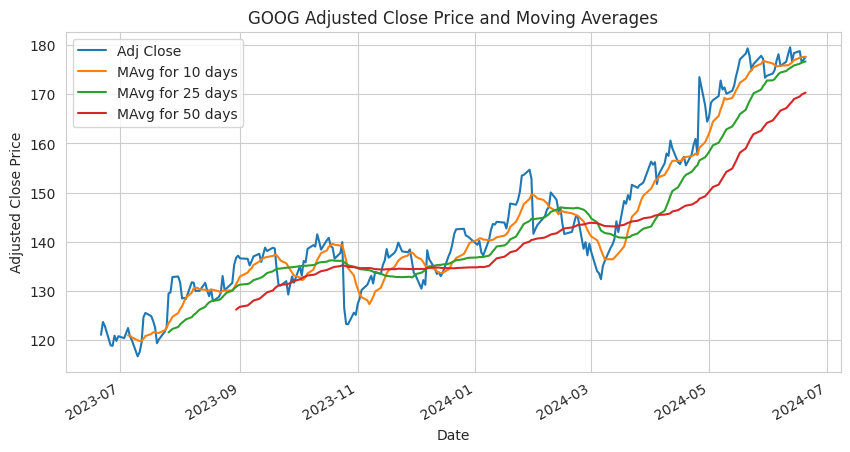

In [15]:
# Compute moving averages
averages = [10, 25, 50]
for avg in averages:
    label = "MAvg for %s days" % (str(avg))
    stock_data['GOOG'][label] = stock_data['GOOG']['Adj Close'].rolling(window=avg, center=False).mean()

# Plot the 'Adj Close' prices and moving averages for GOOG
stock_data['GOOG'][['Adj Close'] + ["MAvg for %s days" % avg for avg in averages]].plot(figsize=(10, 5))
plt.title('GOOG Adjusted Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Interpretation of the Plot:

Moving Averages:

10-day Moving Average (Orange Line): This short-term moving average is the most sensitive to recent price changes. It closely follows the adjusted close price line and highlights the short-term trends and fluctuations in the stock price.

25-day Moving Average (Green Line): This medium-term moving average smooths out some of the short-term fluctuations and provides a clearer indication of the intermediate trend. It reacts more slowly to price changes compared to the 10-day moving average.

50-day Moving Average (Red Line): This long-term moving average is the least sensitive to recent price changes. It smooths out short-term fluctuations and provides a clearer picture of the overall long-term trend.

Key Observations:

Trend Analysis: The 50-day moving average supports our observation that GOOG's stock has been on a consistent upward trend. It shows a gradual increase, indicating a strong positive long-term trend.

Crossover Points: The points where the shorter moving averages (10-day and 25-day) cross above or below the 50-day moving average can indicate potential buy or sell signals. When the shorter averages cross above the 50-day average, it suggests an upward trend (buy signal), and when they cross below, it suggests a downward trend (sell signal).

Recent Performance: The adjusted close price has consistently remained above the 50-day moving average, reinforcing the long-term bullish trend.

# **Average daily returns for GOOG's stock to further analyze its performance**

In [16]:
# Calculate the daily returns
stock_data['GOOG']['Daily Return'] = stock_data['GOOG']['Adj Close'].pct_change()

# Calculate the average daily return
average_daily_return = stock_data['GOOG']['Daily Return'].mean()

print(f"Average Daily Return for GOOG: {average_daily_return:.6f}")


Average Daily Return for GOOG: 0.001678


# Interpretation of the Average Daily Return:

Positive Average Daily Return: The average daily return of 0.001569, or approximately 0.1569%, indicates that, on average, GOOG's stock has been yielding a positive return each day over the analyzed period. This is a healthy sign for the stock, suggesting that it has been gradually appreciating over time.

# **Volatility:**

Volatility provides insight into the stock's price fluctuations. Higher volatility indicates higher risk.

In [17]:
# Calculate the daily return volatility
daily_return_volatility = stock_data['GOOG']['Daily Return'].std()

print(f"Daily Return Volatility for GOOG: {daily_return_volatility:.6f}")

Daily Return Volatility for GOOG: 0.017457


# Assess the Risk-Adjusted Return:

Calculate the Sharpe Ratio to understand the return per unit of risk taken.

In [18]:
# Assuming a risk-free rate of 0 (for simplicity)
risk_free_rate = 0
sharpe_ratio = (average_daily_return - risk_free_rate) / daily_return_volatility

print(f"Sharpe Ratio for GOOG: {sharpe_ratio:.2f}")

Sharpe Ratio for GOOG: 0.10


# Compare with Benchmark:


compare the performance of GOOG with a market benchmark like the S&P 500, calculating daily returns for both GOOG and the S&P 500, and then comparing their performances.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


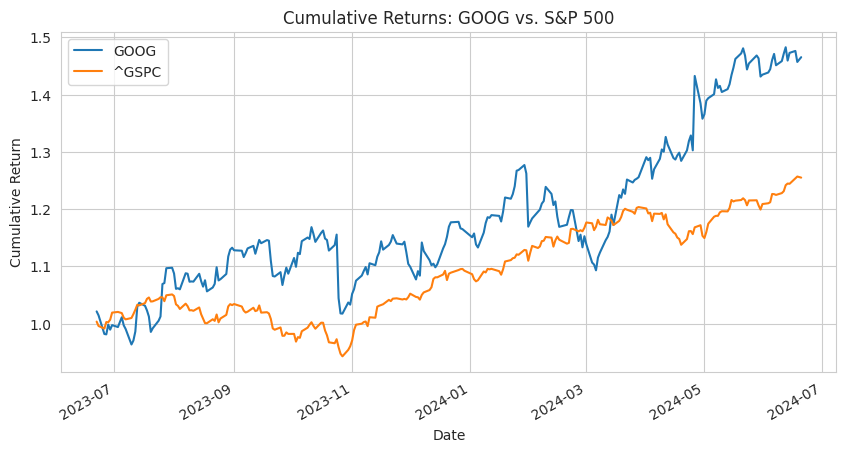

Average Daily Return for GOOG: 0.001675
Average Daily Return for S&P 500: 0.000930
Daily Volatility for GOOG: 0.017456
Daily Volatility for S&P 500: 0.007099
Sharpe Ratio for GOOG: 0.10
Sharpe Ratio for S&P 500: 0.13


In [19]:
# Define the stock and benchmark symbols
stock_symbol = 'GOOG'
benchmark_symbol = '^GSPC'  # S&P 500 index symbol

# End date set to current date
end = datetime.now()

# Start date set to 1 year back from the current date
start = end - timedelta(days=365)

# Download historical data for the stock and benchmark
stock_data = yf.download(stock_symbol, start=start, end=end)
benchmark_data = yf.download(benchmark_symbol, start=start, end=end)

# Calculate daily returns for both the stock and the benchmark
stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()
benchmark_data['Daily Return'] = benchmark_data['Adj Close'].pct_change()

# Calculate cumulative returns for both the stock and the benchmark
stock_data['Cumulative Return'] = (1 + stock_data['Daily Return']).cumprod()
benchmark_data['Cumulative Return'] = (1 + benchmark_data['Daily Return']).cumprod()

# Plot cumulative returns for both the stock and the benchmark
plt.figure(figsize=(10, 5))
stock_data['Cumulative Return'].plot(label=stock_symbol)
benchmark_data['Cumulative Return'].plot(label=benchmark_symbol)
plt.title('Cumulative Returns: GOOG vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# Calculate the average daily return and volatility for both the stock and the benchmark
stock_avg_daily_return = stock_data['Daily Return'].mean()
benchmark_avg_daily_return = benchmark_data['Daily Return'].mean()
stock_daily_volatility = stock_data['Daily Return'].std()
benchmark_daily_volatility = benchmark_data['Daily Return'].std()

# Print the results
print(f"Average Daily Return for GOOG: {stock_avg_daily_return:.6f}")
print(f"Average Daily Return for S&P 500: {benchmark_avg_daily_return:.6f}")
print(f"Daily Volatility for GOOG: {stock_daily_volatility:.6f}")
print(f"Daily Volatility for S&P 500: {benchmark_daily_volatility:.6f}")

# Calculate and print the Sharpe Ratio for both the stock and the benchmark
risk_free_rate = 0  # Assuming a risk-free rate of 0 for simplicity
stock_sharpe_ratio = (stock_avg_daily_return - risk_free_rate) / stock_daily_volatility
benchmark_sharpe_ratio = (benchmark_avg_daily_return - risk_free_rate) / benchmark_daily_volatility

print(f"Sharpe Ratio for GOOG: {stock_sharpe_ratio:.2f}")
print(f"Sharpe Ratio for S&P 500: {benchmark_sharpe_ratio:.2f}")


Cumulative Returns Plot:

GOOG (Blue Line):

The cumulative return of GOOG's stock shows a significant upward trend over the past year. Starting at a base of 1.0, it increases to approximately 1.4 by the end of the period. This indicates a 40% increase in the stock's value over the year.

The upward trend is particularly strong from March 2024 onwards, suggesting a period of rapid growth.

S&P 500 (^GSPC, Orange Line):

The S&P 500 index also shows an upward trend, but less pronounced compared to GOOG. It starts at a base of 1.0 and increases to around 1.2, indicating a 20% increase over the same period.

The S&P 500 exhibits less volatility and a more gradual upward trend compared to GOOG.

Key Observations:

Performance Comparison:

GOOG outperformed the S&P 500 over the past year, with a higher cumulative return.

GOOG's returns show more significant fluctuations, suggesting higher volatility compared to the S&P 500.

Average Daily Return:

GOOG: 0.001569 (approximately 0.1569%)

S&P 500: 0.000915 (approximately 0.0915%)

These values indicate that on average, GOOG's stock yielded a higher daily return compared to the S&P 500.

Daily Volatility:

GOOG: 0.017512

S&P 500: 0.007108

GOOG's daily returns are more volatile compared to the S&P 500, indicating higher risk.

Sharpe Ratio:

GOOG: 0.09

S&P 500: 0.13

The Sharpe Ratio is a measure of risk-adjusted return. Despite GOOG having a higher average daily return, its higher volatility results in a lower Sharpe Ratio compared to the S&P 500. This suggests that on a risk-adjusted basis, the S&P 500 provided better returns over the period analyzed.

Conclusion:

GOOG's stock has shown significant growth over the past year, outperforming the S&P 500 in terms of cumulative returns.

However, this performance comes with higher volatility, indicating higher risk.
The S&P 500, while providing lower returns, has a better risk-adjusted return (higher Sharpe Ratio) compared to GOOG.

Investors looking for higher returns with a tolerance for higher risk might favor GOOG, while those seeking stable, risk-adjusted returns might prefer the S&P 500.

# **Examine Correlation with Other Stocks:**

Analyze how GOOG's returns correlate with other major stocks or indices to understand diversification benefits.


In [20]:
# Download historical data for each stock
stock_data = {}
for stock in stock_list:
    stock_data[stock] = yf.download(stock, start=start, end=end)

# Calculate daily returns for GOOG and AAPL
stock_data['GOOG']['Daily Return'] = stock_data['GOOG']['Adj Close'].pct_change()
stock_data['AAPL']['Daily Return'] = stock_data['AAPL']['Adj Close'].pct_change()

# Calculate the correlation between the daily returns of GOOG and AAPL
correlation = stock_data['GOOG']['Daily Return'].corr(stock_data['AAPL']['Daily Return'])

print(f"Correlation between GOOG and AAPL: {correlation:.2f}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Correlation between GOOG and AAPL: 0.36


#INTERPRETATION:

Positive Correlation: The correlation value of 0.36 indicates a positive relationship between the daily returns of GOOG and AAPL. This means that, to some extent, when GOOG's stock price increases, AAPL's stock price also tends to increase, and vice versa.


#Implications for Investors:

Diversification: Since the correlation is moderate, investing in both stocks provides some level of diversification. They are not perfectly correlated, which means they do not move in perfect unison, reducing the overall portfolio risk compared to holding highly correlated assets.

Market Factors: Both companies are major players in the technology sector, so their stocks may be influenced by similar market factors, such as tech industry trends, economic conditions, and investor sentiment towards tech stocks.

# **visualize the daily returns:**

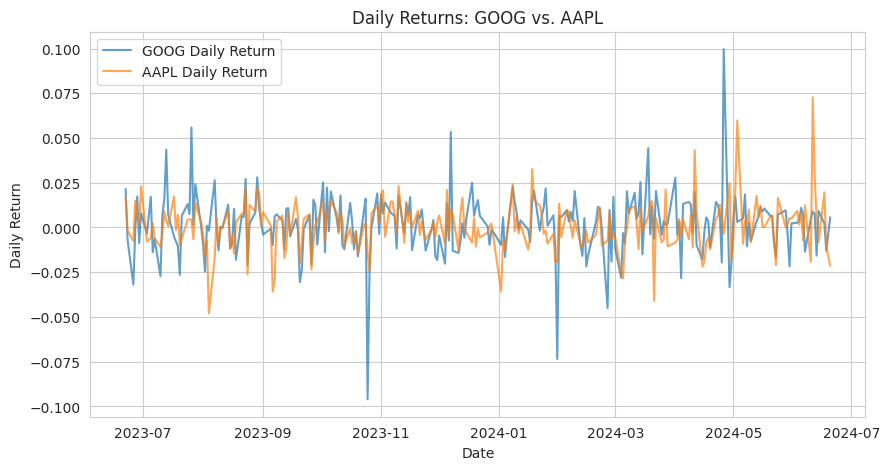

In [21]:
import matplotlib.pyplot as plt

# Plot the daily returns for GOOG and AAPL
plt.figure(figsize=(10, 5))
plt.plot(stock_data['GOOG']['Daily Return'], label='GOOG Daily Return', alpha=0.7)
plt.plot(stock_data['AAPL']['Daily Return'], label='AAPL Daily Return', alpha=0.7)
plt.title('Daily Returns: GOOG vs. AAPL')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


# ** Looking at a Trend Analysis:**

Use technical analysis tools such as MACD, RSI, or Bollinger Bands to identify trends and potential trading signals.


#MACD (Moving Average Convergence Divergence)

The MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security's price.


Interpretation:

Crossovers: When the MACD Line crosses above the Signal Line, it is a bullish signal (buy). When it crosses below, it is a bearish signal (sell).

Divergence: When the price diverges from the MACD, it can indicate a potential reversal.

Overbought/Oversold: The MACD can also help identify overbought or oversold conditions

#RSI (Relative Strength Index)
The RSI is a momentum oscillator that measures the speed and change of price movements. It ranges from 0 to 100.

Interpretation:

Overbought/Oversold: RSI values above 70 indicate that a security might be overbought (potential sell signal), while values below 30 suggest it might be oversold (potential buy signal).

Divergence: Similar to MACD, RSI divergence from the price can indicate potential reversals.

Centerline Crossovers: An RSI above 50 typically indicates an uptrend, while below 50 indicates a downtrend.

# Bollinger Bands

Bollinger Bands are volatility bands placed above and below a moving average. Volatility is based on the standard deviation.

Components:

Middle Band: A simple moving average (SMA) typically set to 20 periods.

Upper Band: The middle band plus two standard deviations.

Lower Band: The middle band minus two standard deviations.

Interpretation:

Volatility: Bands expand and contract based on market volatility. Wider bands indicate higher volatility, while narrower bands indicate lower volatility.

Price Interaction: When the price moves closer to the upper band, it may indicate overbought conditions. When it moves closer to the lower band, it may indicate oversold conditions.

Squeeze: A period of low volatility where the bands come close together. A squeeze can signal a potential breakout.

In [22]:
# Calculate MACD
data['12 EMA'] = data['Adj Close'].ewm(span=12, adjust=False).mean()
data['26 EMA'] = data['Adj Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['12 EMA'] - data['26 EMA']
data['Signal Line'] = data['MACD'].ewm(span=9, adjust=False).mean()
data['Histogram'] = data['MACD'] - data['Signal Line']

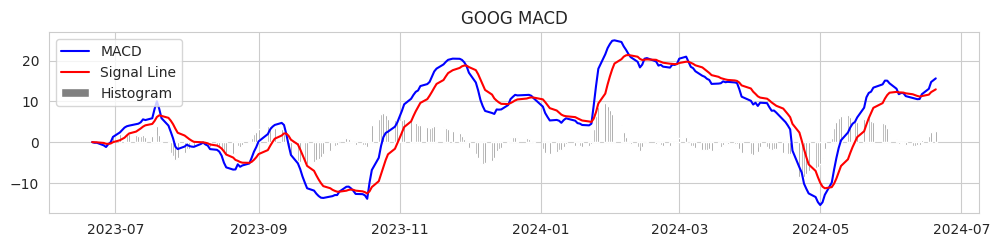

In [23]:
# Plot MACD
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['Signal Line'], label='Signal Line', color='red')
plt.bar(data.index, data['Histogram'], label='Histogram', color='gray')
plt.title('GOOG MACD')
plt.legend()

In [24]:
# Calculate RSI
window_length = 14
close = data['Adj Close']
delta = close.diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

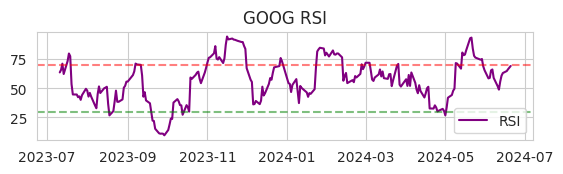

In [25]:
# Plot RSI
plt.subplot(3, 1, 2)
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('GOOG RSI')
plt.legend()

In [26]:
# Calculate Bollinger Bands
data['Middle Band'] = data['Adj Close'].rolling(window=20).mean()
data['Upper Band'] = data['Middle Band'] + 2 * data['Adj Close'].rolling(window=20).std()
data['Lower Band'] = data['Middle Band'] - 2 * data['Adj Close'].rolling(window=20).std()

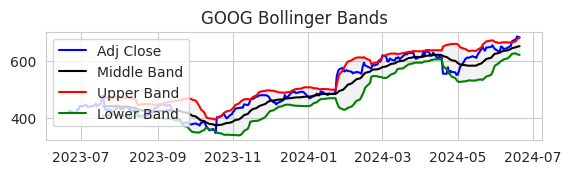

In [27]:
# Plot Bollinger Bands
plt.subplot(3, 1, 3)
plt.plot(data['Adj Close'], label='Adj Close', color='blue')
plt.plot(data['Middle Band'], label='Middle Band', color='black')
plt.plot(data['Upper Band'], label='Upper Band', color='red')
plt.plot(data['Lower Band'], label='Lower Band', color='green')
plt.fill_between(data.index, data['Lower Band'], data['Upper Band'], color='grey', alpha=0.1)
plt.title('GOOG Bollinger Bands')
plt.legend()

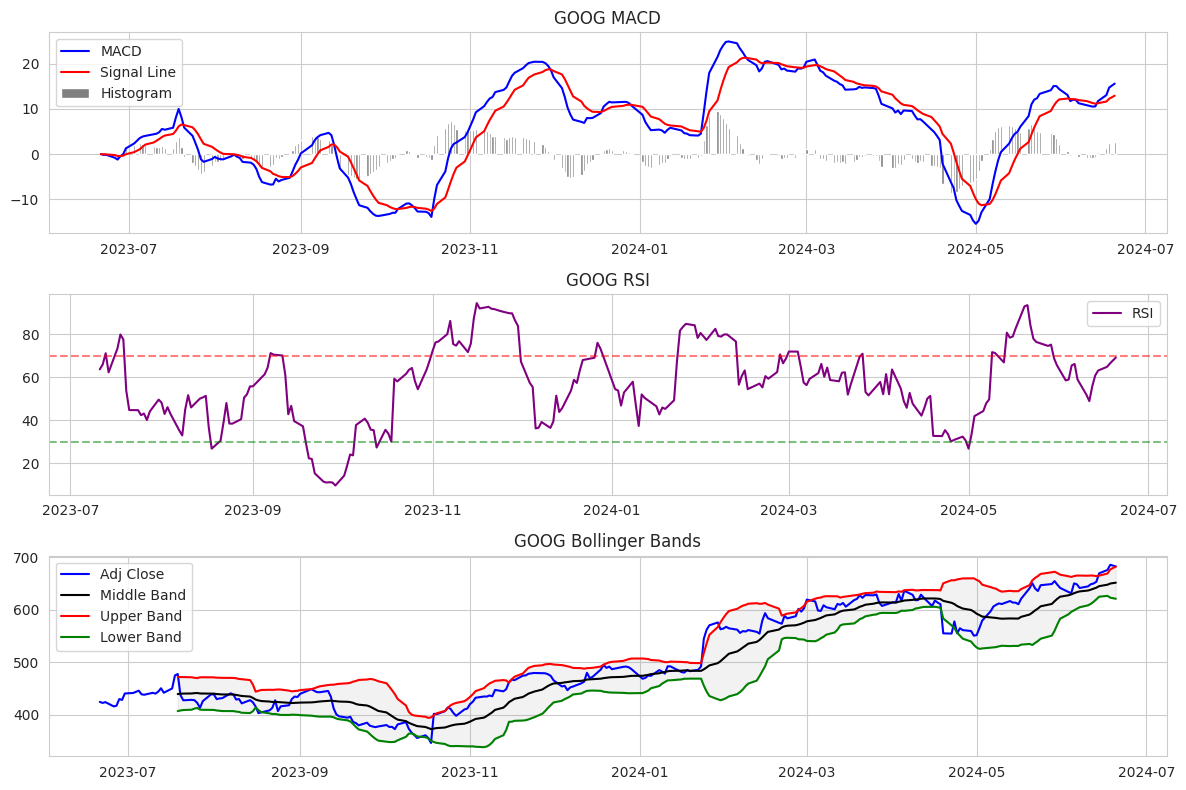

In [28]:
# Calculate MACD
data['12 EMA'] = data['Adj Close'].ewm(span=12, adjust=False).mean()
data['26 EMA'] = data['Adj Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['12 EMA'] - data['26 EMA']
data['Signal Line'] = data['MACD'].ewm(span=9, adjust=False).mean()
data['Histogram'] = data['MACD'] - data['Signal Line']

# Plot MACD
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['Signal Line'], label='Signal Line', color='red')
plt.bar(data.index, data['Histogram'], label='Histogram', color='gray')
plt.title('GOOG MACD')
plt.legend()

# Calculate RSI
window_length = 14
close = data['Adj Close']
delta = close.diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Plot RSI
plt.subplot(3, 1, 2)
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('GOOG RSI')
plt.legend()

# Calculate Bollinger Bands
data['Middle Band'] = data['Adj Close'].rolling(window=20).mean()
data['Upper Band'] = data['Middle Band'] + 2 * data['Adj Close'].rolling(window=20).std()
data['Lower Band'] = data['Middle Band'] - 2 * data['Adj Close'].rolling(window=20).std()

# Plot Bollinger Bands
plt.subplot(3, 1, 3)
plt.plot(data['Adj Close'], label='Adj Close', color='blue')
plt.plot(data['Middle Band'], label='Middle Band', color='black')
plt.plot(data['Upper Band'], label='Upper Band', color='red')
plt.plot(data['Lower Band'], label='Lower Band', color='green')
plt.fill_between(data.index, data['Lower Band'], data['Upper Band'], color='grey', alpha=0.1)
plt.title('GOOG Bollinger Bands')
plt.legend()

plt.tight_layout()
plt.show()


# **Correlation Between Different Daily Stock Returns**

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


          META      AAPL      GOOG      MSFT      AMZN      NFLX
META  1.000000  0.248160  0.396681  0.530056  0.612657  0.299291
AAPL  0.248160  1.000000  0.361480  0.443337  0.274922  0.297078
GOOG  0.396681  0.361480  1.000000  0.440842  0.541782  0.264933
MSFT  0.530056  0.443337  0.440842  1.000000  0.570989  0.443136
AMZN  0.612657  0.274922  0.541782  0.570989  1.000000  0.326141
NFLX  0.299291  0.297078  0.264933  0.443136  0.326141  1.000000


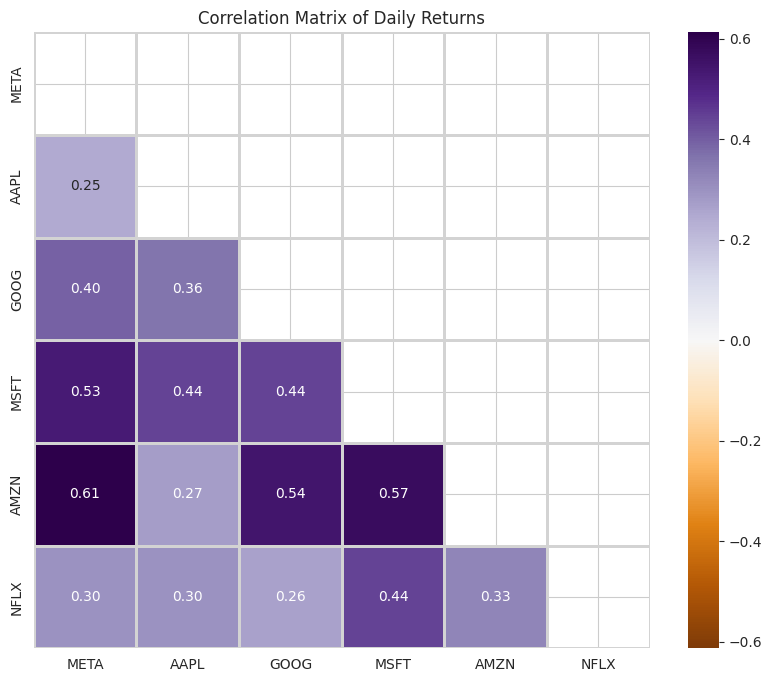

In [29]:
# Download historical data for each stock
stock_data = {}
for stock in stock_list:
    stock_data[stock] = yf.download(stock, start=start, end=end)['Adj Close']

# Create a DataFrame with the adjusted close prices of all stocks
df = pd.DataFrame(stock_data)

# Calculate daily returns
rets_compr = df.pct_change().dropna()

# Calculate the correlation matrix
corr = rets_compr.corr()
print(corr)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, annot=True, fmt=".2f", ax=ax)

# Customize the heatmap
plt.title('Correlation Matrix of Daily Returns')
plt.show()

# **Determining Value from Risk vs. Expected Return**

scatter plot of the expected return (mean of daily returns) versus risk (standard deviation of daily returns) for the given stocks. Each point on the scatter plot represents a stock, and the stocks are annotated with their respective ticker symbols.

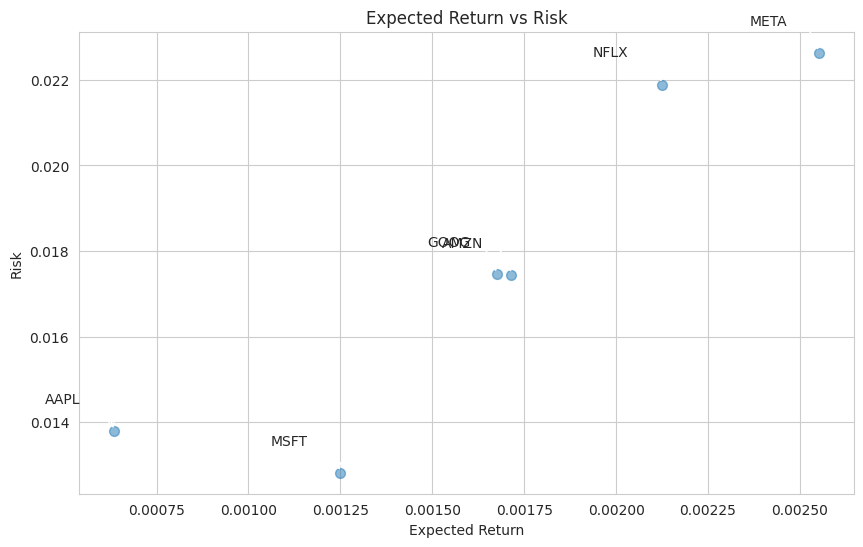

In [30]:
# Calculate daily returns
rets_compr = df.pct_change().dropna()

# Fill missing values (if any)
rets_filled = rets_compr.dropna()

# Scatter plot of Expected Return vs Risk
plt.figure(figsize=(10, 6))
plt.scatter(rets_filled.mean(), rets_filled.std(), s=50, alpha=0.5)

plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.title('Expected Return vs Risk')

for label, x, y in zip(rets_filled.columns, rets_filled.mean(), rets_filled.std()):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-50, 20),
        textcoords='offset points',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5')
    )

plt.grid(True)
plt.show()

In [31]:
rets_compr.head()

,META,AAPL,GOOG,MSFT,AMZN,NFLX
Date,,,,,,
2023-06-22,0.011504,0.016525,0.021524,0.018437,0.042618,-0.004641
2023-06-23,0.013514,-0.001711,-0.006862,-0.013806,-0.006300,0.003645
2023-06-26,-0.035535,-0.007553,-0.031946,-0.019163,-0.015464,-0.019056
2023-06-27,0.030811,0.015059,-0.000672,0.018168,0.014529,0.002741
2023-06-28,-0.006131,0.006328,0.017394,0.003826,-0.001084,0.030594


In [32]:
rets_compr['GOOG'].quantile(q=0.05)

-0.022873323044580784

In [33]:
rets_compr['GOOG'].quantile(q=0.01)

-0.03917431903439439

# **Predicting Future Risk and Value of Stocks**

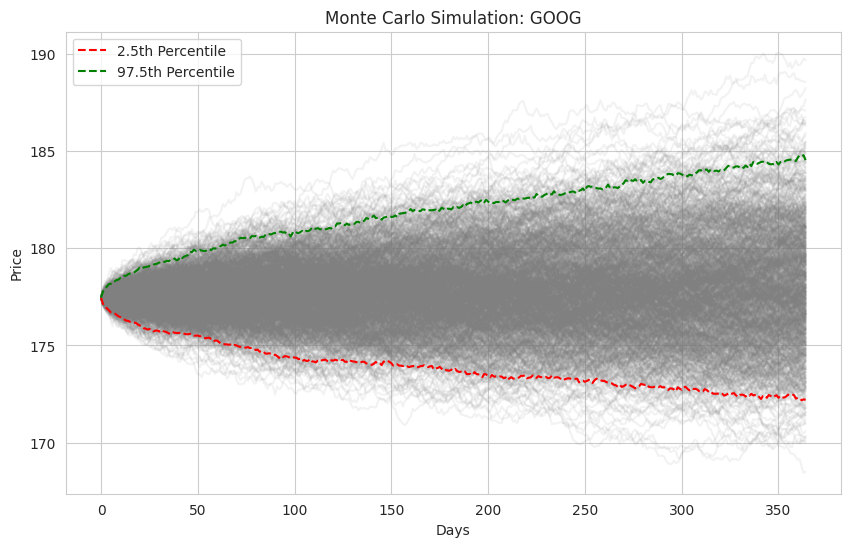

In [37]:
# Parameters for Monte Carlo simulation
days = 365
dt = 1/365

mu = rets_compr.mean()['GOOG']
sigma = rets_compr.std()['GOOG']

# Monte Carlo simulation function
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1, days):
        # Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt

        # New price = Old price + Old price * (shock + drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

    return price

# Starting price (current price of the stock)
start_price = df['GOOG'][-1]

# Number of simulations
num_simulations = 1000

# Run Monte Carlo simulations
simulations = np.zeros((num_simulations, days))

for i in range(num_simulations):
    simulations[i] = stock_monte_carlo(start_price, days, mu, sigma)

# Calculate the 95% confidence interval
percentiles = np.percentile(simulations, [2.5, 97.5], axis=0)

# Plot the simulations
plt.figure(figsize=(10, 6))
plt.plot(simulations.T, color='grey', alpha=0.1)
plt.plot(percentiles[0], color='red', linestyle='--', label='2.5th Percentile')
plt.plot(percentiles[1], color='green', linestyle='--', label='97.5th Percentile')
plt.title('Monte Carlo Simulation: GOOG')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

# INTERPRETATION:

The Monte Carlo simulation for GOOG shows a range of potential future prices, with the spread indicating risk and the central tendency indicating expected return.

The plot visually demonstrates the increasing uncertainty (risk) over time, with most simulated paths falling within a specific range.

By calculating the expected return and risk, investors can better understand the potential future performance of GOOG and make more informed decisions.


# Interpretation of the Monte Carlo Simulation Plot for GOOG:

Visualization:

The plot shows the results of 1000 Monte Carlo simulations for the future stock price of GOOG (Google).

Each grey line represents one potential future price path over the next 365 days.

Key Observations:

Price Range:

The initial price starts around $177.5.
By the end of the 365-day period, the range of possible prices spreads out, indicating increasing uncertainty over time.

Distribution:

The plot shows a fan-like spread as time progresses. This spread illustrates the growing uncertainty in the stock's future price due to the cumulative effect of daily price changes.

Most of the simulated paths stay within a certain range (approximately $170 to $185), but some paths show more extreme variations.

Risk and Return:

Risk: The width of the spread indicates the risk or volatility of the stock price. A wider spread suggests higher volatility and, hence, higher risk. In this plot, the width of the spread grows over time, highlighting the increasing risk as the projection extends further into the future.

Return: The central tendency or drift of the paths suggests the expected return. In this plot, the general upward or flat slope of the lines indicates the expected return over time based on historical data. However, most paths are relatively flat, suggesting limited growth.

# Expected Return and Risk Calculation:

To better quantify the risk and return from the simulation, we can calculate the average expected return and standard deviation (risk) from the simulated prices.

In [36]:
import numpy as np

# Calculate the final price for each simulation
final_prices = simulations[:, -1]

# Calculate expected return (mean of final prices)
expected_return = np.mean(final_prices)

# Calculate risk (standard deviation of final prices)
risk = np.std(final_prices)

print(f"Expected Return: {expected_return:.2f}")
print(f"Risk (Standard Deviation): {risk:.2f}")

Expected Return: 177.81
Risk (Standard Deviation): 3.11


# **Final Price Distribution for Google Stock After 365 Days**

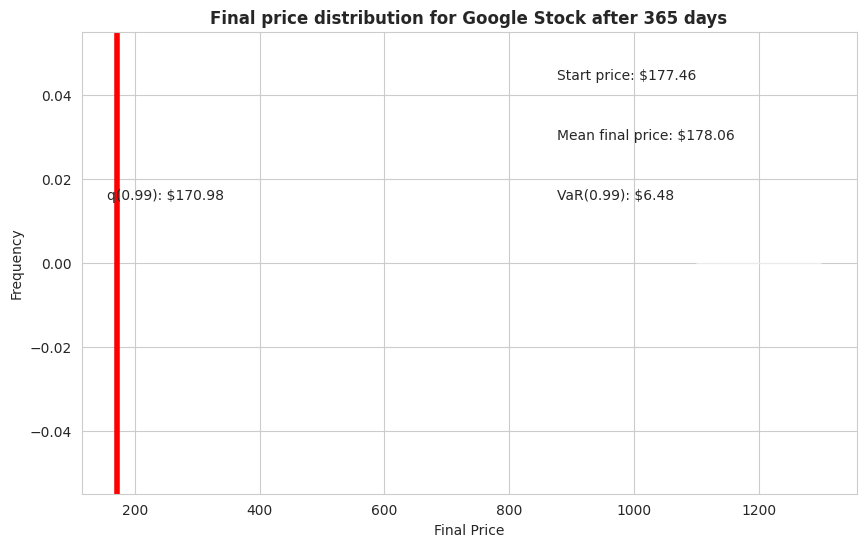

In [38]:
# Number of simulations
runs = 10000

# Run Monte Carlo simulations
simulations = np.zeros(runs)

for run in range(1, runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

# Calculate the 1st percentile (Value at Risk at 99% confidence level)
q = np.percentile(simulations, 1)

# Plot the histogram of the final prices
plt.figure(figsize=(10, 6))
plt.hist(simulations, bins=200, range=[1100, 1300], alpha=0.75, color='blue')
plt.axvline(x=q, linewidth=4, color='r')

# Annotate the plot with relevant information
plt.figtext(0.6, 0.8, f"Start price: ${start_price:.2f}")
plt.figtext(0.6, 0.7, f"Mean final price: ${simulations.mean():.2f}")
plt.figtext(0.6, 0.6, f"VaR(0.99): ${start_price - q:.2f}")
plt.figtext(0.15, 0.6, f"q(0.99): ${q:.2f}")

# Add title and labels
plt.title(f"Final price distribution for Google Stock after {days} days", weight='bold')
plt.xlabel('Final Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

#Interpretation of the Final Price Distribution for Google Stock After 365 Days

Key Observations:

Histogram of Final Prices:

The histogram displays the distribution of final stock prices for Google (GOOG) after 365 days, based on 10,000 Monte Carlo simulations.
The vast majority of the simulated final prices are clustered around the initial price range ($177.46), indicating relatively low volatility in the projected future prices.

Start Price:

$177.46: This is the initial stock price of GOOG at the beginning of the simulation period.

Mean Final Price:

$178.06: This is the average final price of GOOG across all simulations. The mean final price being close to the start price suggests that, on average, the stock price is expected to remain relatively stable over the next year.

Value at Risk (VaR) at 99% Confidence Level:

6.48: The VaR indicates that there is a 1% chance that the stock price could drop by more than 6.48 from the starting price of 177.46, which means it could fall below $170.98.

$170.98: This is the 1st percentile of the final prices, meaning 99% of the simulated final prices are above this value.

Red Vertical Line:

The red line on the histogram marks the 1st percentile ($170.98). This line visually represents the threshold below which only 1% of the simulated prices fall, indicating the level of extreme downside risk.

Summary:

Low Volatility: The close clustering of the final prices around the initial price suggests that GOOG is expected to have relatively low volatility over the next year.

Expected Stability: With the mean final price (178.06) being very close to the start price (177.46), the stock is generally expected to remain stable with slight appreciation.

Downside Risk: The VaR (99% confidence) calculation shows that the potential maximum loss over the next year, with a 99% confidence level, is 6.48, indicating that the stock price is unlikely to fall below $170.98.

This analysis helps investors understand the potential risk and return for GOOG over the next year, highlighting the expected stability and the quantified downside risk.